# Project 1 Prediksi Cuaca Daerah Surabaya Multivariate

## Load Library

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## EDA

### Load Data

In [25]:
df = pd.read_csv('sby.csv',sep=';')
df

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions
0,surabaya,01/12/2023 00:00,27.0,30.6,25.0,88.84,0.0,0,NaN,0,...,9.4,270.0,1009.0,50.0,7.0,0,0.0,0,30,Partially cloudy
1,surabaya,01/12/2023 01:00,27.9,32.0,24.4,81.40,0.0,0,NaN,0,...,3.6,258.0,1009.0,75.9,7.1,0,0.0,0,30,Partially cloudy
2,surabaya,01/12/2023 02:00,27.0,31.2,26.0,94.27,0.0,0,rain,0,...,13.0,70.0,1008.0,50.0,3.0,0,0.0,0,30,Partially cloudy
3,surabaya,01/12/2023 03:00,27.0,31.2,26.0,94.27,0.0,0,NaN,0,...,3.6,80.0,1007.0,50.0,5.0,0,0.0,0,30,Partially cloudy
4,surabaya,01/12/2023 04:00,27.2,31.9,26.1,93.51,2.0,100,rain,0,...,0.4,320.0,1008.4,82.9,7.4,0,0.0,0,30,"Rain, Partially cloudy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,surabaya,30/11/2024 19:00,27.0,30.0,24.0,83.67,0.8,100,rain,0,...,7.6,290.0,1007.0,25.0,8.0,0,0.0,0,30,"Rain, Partially cloudy"
8780,surabaya,30/11/2024 20:00,27.0,30.0,24.0,83.67,0.0,0,rain,0,...,9.4,290.0,1007.0,25.0,8.0,0,0.0,0,30,Partially cloudy
8781,surabaya,30/11/2024 21:00,27.0,30.0,24.0,83.67,0.5,100,rain,0,...,7.6,310.0,1007.0,25.0,8.0,0,0.0,0,30,"Rain, Partially cloudy"
8782,surabaya,30/11/2024 22:00,26.0,26.0,24.0,88.75,0.1,100,rain,0,...,9.4,270.0,1006.0,25.0,8.0,0,0.0,0,30,"Rain, Partially cloudy"


### Info Data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              8784 non-null   object 
 1   datetime          8784 non-null   object 
 2   temp              8784 non-null   float64
 3   feelslike         8784 non-null   float64
 4   dew               8784 non-null   float64
 5   humidity          8784 non-null   float64
 6   precip            8784 non-null   float64
 7   precipprob        8784 non-null   int64  
 8   preciptype        1727 non-null   object 
 9   snow              8784 non-null   int64  
 10  snowdepth         8784 non-null   int64  
 11  windgust          8784 non-null   float64
 12  windspeed         8784 non-null   float64
 13  winddir           8784 non-null   float64
 14  sealevelpressure  8784 non-null   float64
 15  cloudcover        8784 non-null   float64
 16  visibility        8784 non-null   float64


### Encoding Data Untuk EDA

In [27]:
eda_encoded = df.copy()

eda_encoded.drop(columns=['datetime','name'], inplace=True)

encoderd_cols = ['preciptype', 'conditions',]

label_encoder = LabelEncoder()
for col in encoderd_cols:
    eda_encoded[col] = label_encoder.fit_transform(df[col].astype(str))

eda_encoded = pd.get_dummies(eda_encoded, drop_first=True)

eda_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temp              8784 non-null   float64
 1   feelslike         8784 non-null   float64
 2   dew               8784 non-null   float64
 3   humidity          8784 non-null   float64
 4   precip            8784 non-null   float64
 5   precipprob        8784 non-null   int64  
 6   preciptype        8784 non-null   int32  
 7   snow              8784 non-null   int64  
 8   snowdepth         8784 non-null   int64  
 9   windgust          8784 non-null   float64
 10  windspeed         8784 non-null   float64
 11  winddir           8784 non-null   float64
 12  sealevelpressure  8784 non-null   float64
 13  cloudcover        8784 non-null   float64
 14  visibility        8784 non-null   float64
 15  solarradiation    8784 non-null   int64  
 16  solarenergy       8784 non-null   float64


### Histogram Data

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'feelslike'}>,
        <Axes: title={'center': 'dew'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'precip'}>,
        <Axes: title={'center': 'precipprob'}>,
        <Axes: title={'center': 'preciptype'}>,
        <Axes: title={'center': 'snow'}>],
       [<Axes: title={'center': 'snowdepth'}>,
        <Axes: title={'center': 'windgust'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'winddir'}>],
       [<Axes: title={'center': 'sealevelpressure'}>,
        <Axes: title={'center': 'cloudcover'}>,
        <Axes: title={'center': 'visibility'}>,
        <Axes: title={'center': 'solarradiation'}>],
       [<Axes: title={'center': 'solarenergy'}>,
        <Axes: title={'center': 'uvindex'}>,
        <Axes: title={'center': 'severerisk'}>,
        <Axes: title={'center': 'conditions'}>]], dtype=object)

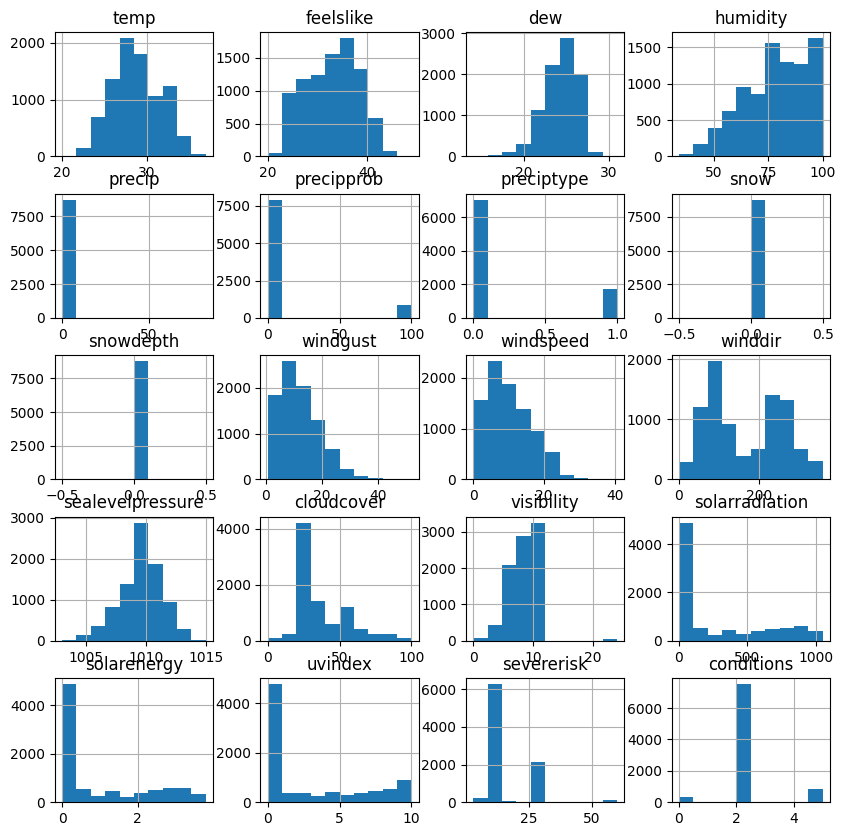

In [28]:
eda_encoded.hist(figsize=(10,10))

### Corelation Matrix

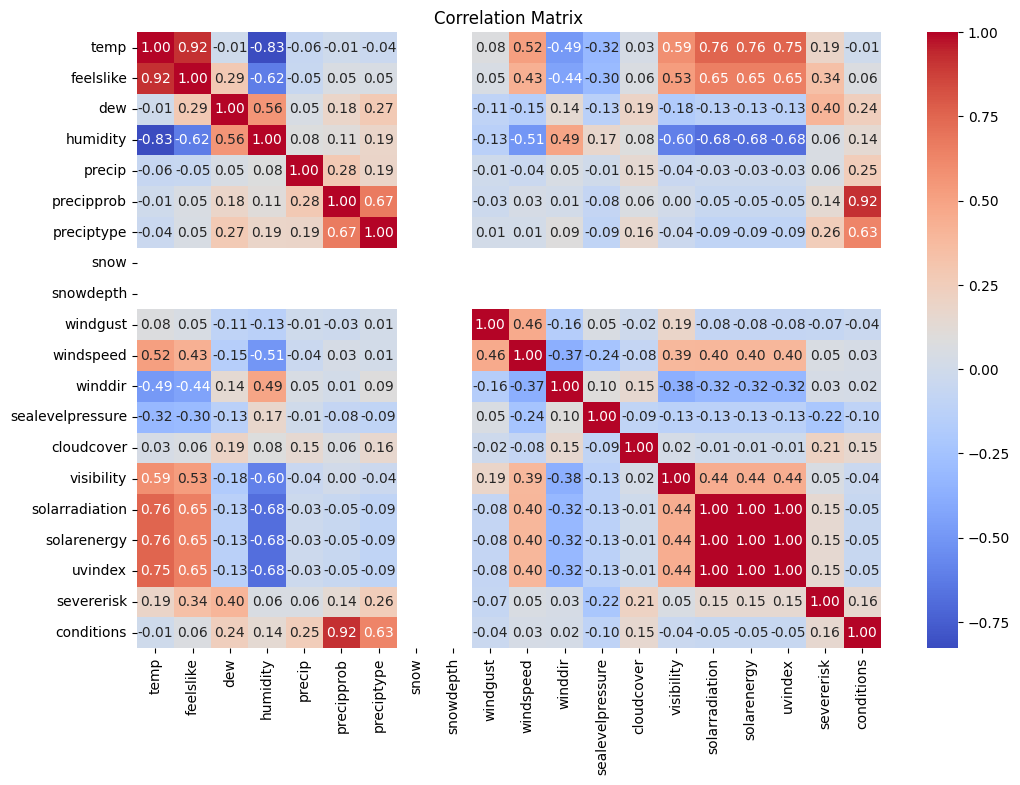

In [29]:
corr_matrix = eda_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Prepocessing

### Label Mapping

In [30]:
label_mapping = {
    'Partially cloudy': 'Cloudy',
    'Rain, Partially cloudy': 'Rain',
    'Overcast': 'Cloudy',
    'Rain, Overcast': 'Rain',
    'Clear': 'Clear',
    'Rain': 'Rain'
}
df['conditions'] = df['conditions'].map(label_mapping)
df['conditions'].unique()

array(['Cloudy', 'Rain', 'Clear'], dtype=object)

In [31]:
df['conditions'].unique()

array(['Cloudy', 'Rain', 'Clear'], dtype=object)

### Select Feature

In [32]:
df.drop(columns=['snowdepth', 'snow', 'preciptype', 'precipprob', 'precip', 'name', 'datetime', 'severerisk', 'uvindex', 'solarradiation', 'solarenergy', 
'sealevelpressure'], inplace=True)
df

,temp,feelslike,dew,humidity,windgust,windspeed,winddir,cloudcover,visibility,conditions
0,27.0,30.6,25.0,88.84,11.9,9.4,270.0,50.0,7.0,Cloudy
1,27.9,32.0,24.4,81.40,6.1,3.6,258.0,75.9,7.1,Cloudy
2,27.0,31.2,26.0,94.27,2.5,13.0,70.0,50.0,3.0,Cloudy
3,27.0,31.2,26.0,94.27,5.4,3.6,80.0,50.0,5.0,Cloudy
4,27.2,31.9,26.1,93.51,7.2,0.4,320.0,82.9,7.4,Rain
...,...,...,...,...,...,...,...,...,...,...
8779,27.0,30.0,24.0,83.67,6.1,7.6,290.0,25.0,8.0,Rain
8780,27.0,30.0,24.0,83.67,7.2,9.4,290.0,25.0,8.0,Cloudy
8781,27.0,30.0,24.0,83.67,7.2,7.6,310.0,25.0,8.0,Rain
8782,26.0,26.0,24.0,88.75,6.8,9.4,270.0,25.0,8.0,Rain


### Encoding Label

In [33]:
label_encoder_new = LabelEncoder()

df['conditions'] = label_encoder_new.fit_transform(df['conditions'])

df

,temp,feelslike,dew,humidity,windgust,windspeed,winddir,cloudcover,visibility,conditions
0,27.0,30.6,25.0,88.84,11.9,9.4,270.0,50.0,7.0,1
1,27.9,32.0,24.4,81.40,6.1,3.6,258.0,75.9,7.1,1
2,27.0,31.2,26.0,94.27,2.5,13.0,70.0,50.0,3.0,1
3,27.0,31.2,26.0,94.27,5.4,3.6,80.0,50.0,5.0,1
4,27.2,31.9,26.1,93.51,7.2,0.4,320.0,82.9,7.4,2
...,...,...,...,...,...,...,...,...,...,...
8779,27.0,30.0,24.0,83.67,6.1,7.6,290.0,25.0,8.0,2
8780,27.0,30.0,24.0,83.67,7.2,9.4,290.0,25.0,8.0,1
8781,27.0,30.0,24.0,83.67,7.2,7.6,310.0,25.0,8.0,2
8782,26.0,26.0,24.0,88.75,6.8,9.4,270.0,25.0,8.0,2


In [34]:
# joblib.dump(label_encoder_new, 'label_encoder.pkl')

['label_encoder.pkl']

### Corelation Matrix Setelah Prepocessing

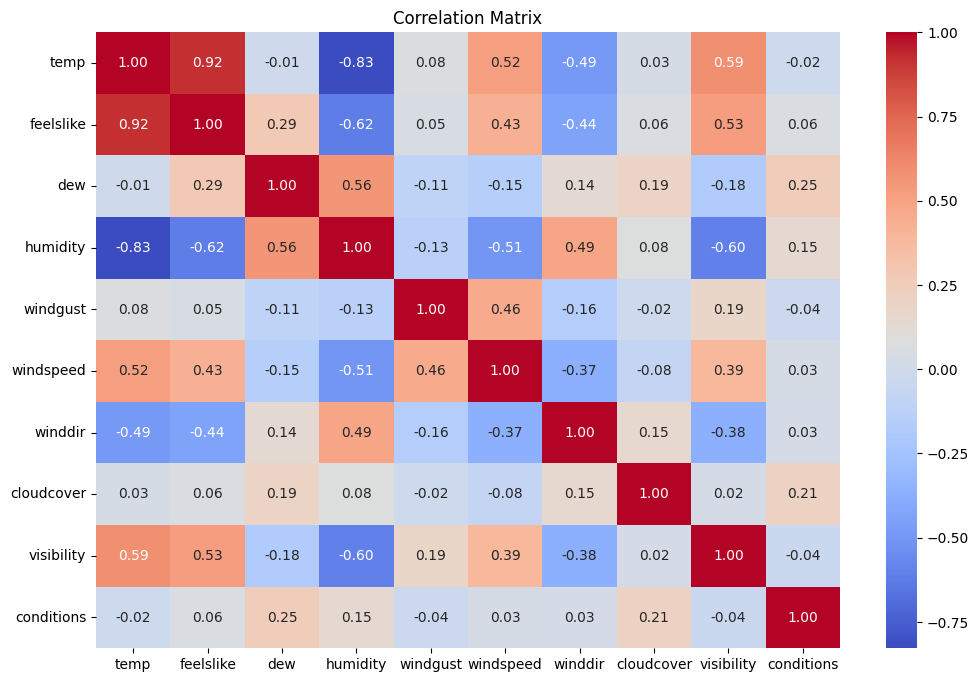

In [126]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Jumlah Data Setiap Class

In [127]:
unique_labels, counts = np.unique(df['conditions'], return_counts=True)
label_counts = dict(zip(unique_labels, counts))
label_counts

{0: 340, 1: 7575, 2: 869}

### Split Data

In [ ]:
Xdata = df.drop('conditions', axis=1)
ydata = df['conditions']

X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.2, random_state=42, stratify=ydata)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7027, 9)
X_test shape: (1757, 9)
y_train shape: (7027,)
y_test shape: (1757,)


### Balancing dengan Oversampling Smote 

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


### Jumlah Data Setiap Class Setelah Balancing

In [ ]:
unique_labels, counts = np.unique(y_train, return_counts=True)
print('Sebelum  = ',dict(zip(unique_labels, counts)))

unique_labels, counts = np.unique(y_resampled, return_counts=True)
print('Sesudah = ', dict(zip(unique_labels, counts)))


Sebelum  =  {0: 272, 1: 6060, 2: 695}
Sesudah =  {0: 6060, 1: 6060, 2: 6060}


## Modelling

### Modelling dengan Random Forest

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, criterion="gini", bootstrap=True, random_state=42)
rf_classifier.fit(X_resampled, y_resampled)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.8821855435401252
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       0.92      0.95      0.93      1515
           2       0.37      0.26      0.30       174

    accuracy                           0.88      1757
   macro avg       0.76      0.74      0.74      1757
weighted avg       0.87      0.88      0.87      1757



### Confusion Matrix Data Tes

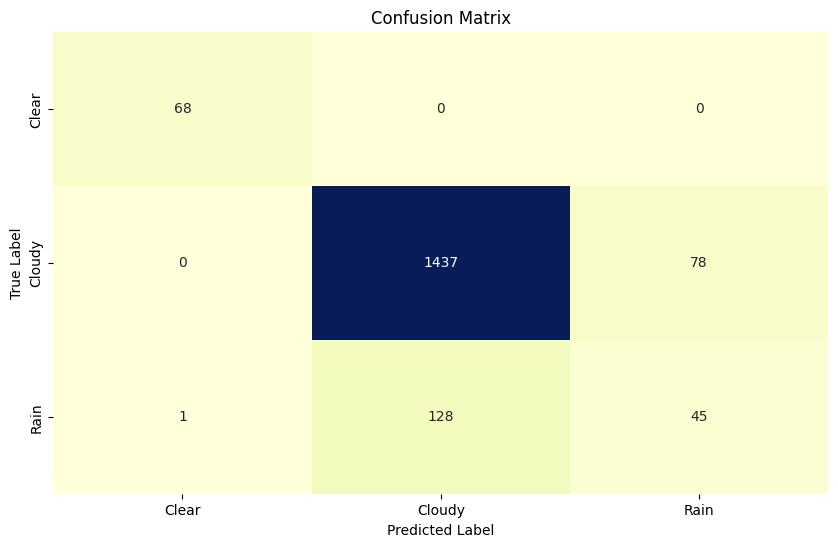

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False, xticklabels=label_encoder_new.classes_, yticklabels=label_encoder_new.classes_)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.show()

### Cross Validation Score

In [ ]:
cv_score = cross_val_score(rf_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')

In [168]:
print("Cross Validation Score:", cv_score)
print("Average cross-validation score:", np.mean(cv_score))

Cross Validation Score: [0.87293729 0.96974697 0.97194719 0.96369637 0.96864686]
Average cross-validation score: 0.9493949394939494


### Confusion Matrix Setiap Fold

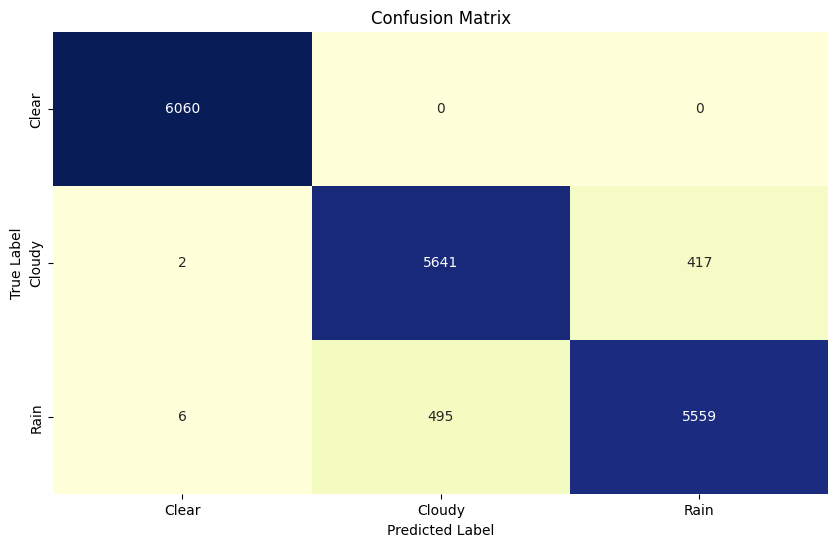

In [169]:
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(rf_classifier, X_resampled, y_resampled, cv=5)
cm_cv = confusion_matrix(y_resampled, y_pred_cv)

plt.figure(figsize=(10,6))
sns.heatmap(cm_cv, annot=True, fmt="d", cmap="YlGnBu", cbar=False, xticklabels=label_encoder_new.classes_, yticklabels=label_encoder_new.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Save the model


### Grid Search RF

In [170]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_resampled, y_resampled)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

### Best Parameters

In [183]:
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# print("Test Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9502200220022002
Test Accuracy: 0.8821855435401252
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       0.92      0.95      0.93      1515
           2       0.37      0.26      0.30       174

    accuracy                           0.88      1757
   macro avg       0.76      0.74      0.74      1757
weighted avg       0.87      0.88      0.87      1757



Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9502200220022002
Test Accuracy: 0.8821855435401252
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       0.92      0.95      0.93      1515
           2       0.37      0.26      0.30       174

    accuracy                           0.88      1757
   macro avg       0.76      0.74      0.74      1757
weighted avg       0.87      0.88      0.87      1757


In [ ]:
best_model = RandomForestClassifier('max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, random_state=42, n_jobs=-1)

In [185]:
cv_score = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

In [186]:
print("Cross Validation Score:", cv_score)
print("Average cross-validation score:", np.mean(cv_score))

Cross Validation Score: [0.87623762 0.96864686 0.97277228 0.96507151 0.96837184]
Average cross-validation score: 0.9502200220022002


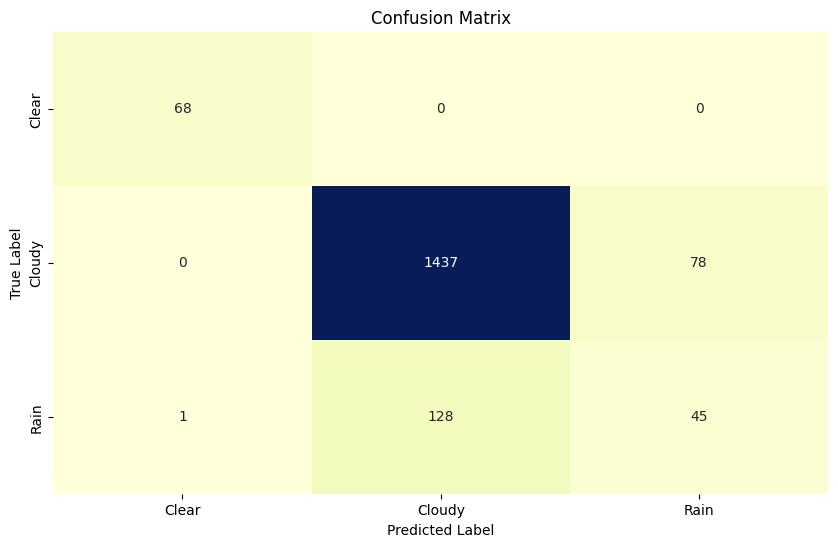

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False, xticklabels=label_encoder_new.classes_, yticklabels=label_encoder_new.classes_)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.show()

In [172]:
# joblib.dump(best_model, 'model_rf.pkl')

['model_rf.pkl']

## Testing

In [ ]:
import requests
api = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Surabaya,ID/today?unitGroup=metric&include=hours&key=AQCL3EG5SNW9XDN44A67J95UB'

response = requests.get(api)

if response.status_code == 200:
	data = response.json()
	print(data)
else:
	print(f"Error: {response.status_code}")
	print(response.text)
	



{'queryCost': 1, 'latitude': -7.26309, 'longitude': 112.731, 'resolvedAddress': 'Surabaya, Indonesia', 'address': 'Surabaya,ID', 'timezone': 'Asia/Jakarta', 'tzoffset': 7.0, 'days': [{'datetime': '2024-12-03', 'datetimeEpoch': 1733158800, 'tempmax': 33.0, 'tempmin': 24.0, 'temp': 28.6, 'feelslikemax': 35.8, 'feelslikemin': 24.0, 'feelslike': 30.8, 'dew': 22.6, 'humidity': 71.8, 'precip': 6.3, 'precipprob': 100.0, 'precipcover': 33.33, 'preciptype': ['rain'], 'snow': 0.0, 'snowdepth': 0.0, 'windgust': 11.2, 'windspeed': 9.4, 'winddir': 88.4, 'pressure': 1007.1, 'cloudcover': 86.1, 'visibility': 17.1, 'solarradiation': 259.9, 'solarenergy': 22.5, 'uvindex': 9.0, 'severerisk': 10.0, 'sunrise': '05:03:29', 'sunriseEpoch': 1733177009, 'sunset': '17:34:34', 'sunsetEpoch': 1733222074, 'moonphase': 0.07, 'conditions': 'Rain, Partially cloudy', 'description': 'Partly cloudy throughout the day with rain.', 'icon': 'rain', 'stations': ['WARR', 'remote'], 'source': 'comb', 'hours': [{'datetime': '

In [ ]:
selected_hour = next((hour for hour in data['days'][0]['hours'] if hour['datetime'] == '03:00:00'), None)

df_tes = pd.DataFrame(selected_hour, index=[0])
df_tes.drop(columns=['snowdepth', 'snow', 'preciptype', 'precipprob', 'precip', 'datetime', 'icon', 'stations', 'source', 'datetime', 'datetimeEpoch', 'solarradiation', 'solarenergy', 'uvindex' , 'severerisk', 'pressure'], inplace=True)

,temp,feelslike,humidity,dew,windgust,windspeed,winddir,visibility,cloudcover,conditions
0,24.0,24.0,100.0,24.0,5.0,7.6,250.0,5.0,25.0,"Rain, Partially cloudy"


In [ ]:
# Ensure the label_mapping dictionary is available
label_mapping = {
	'Partially cloudy': 'Cloudy',
	'Rain, Partially cloudy': 'Rain',
	'Overcast': 'Cloudy',
	'Rain, Overcast': 'Rain',
	'Clear': 'Clear',
	'Rain': 'Rain'
}

# Mengganti label pada kolom 'conditions'
df_tes['conditions'] = df_tes['conditions'].map(label_mapping)

df_tes

,temp,feelslike,humidity,dew,windgust,windspeed,winddir,visibility,cloudcover,conditions
0,24.0,24.0,100.0,24.0,5.0,7.6,250.0,5.0,25.0,Rain


In [153]:
# encode the labels
df_tes['conditions'] = label_encoder_new.transform(df_tes['conditions'])
df_tes

,temp,feelslike,humidity,dew,windgust,windspeed,winddir,visibility,cloudcover,conditions
0,24.0,24.0,100.0,24.0,5.0,7.6,250.0,5.0,25.0,2


In [189]:
import requests
api = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Surabaya,ID/today?unitGroup=metric&include=hours&key=AQCL3EG5SNW9XDN44A67J95UB'

response = requests.get(api)

if response.status_code == 200:
	data = response.json()
	print(data)
else:
	print(f"Error: {response.status_code}")
	print(response.text)
	



{'queryCost': 1, 'latitude': -7.26309, 'longitude': 112.731, 'resolvedAddress': 'Surabaya, Indonesia', 'address': 'Surabaya,ID', 'timezone': 'Asia/Jakarta', 'tzoffset': 7.0, 'days': [{'datetime': '2024-12-03', 'datetimeEpoch': 1733158800, 'tempmax': 33.0, 'tempmin': 24.0, 'temp': 28.5, 'feelslikemax': 35.8, 'feelslikemin': 24.0, 'feelslike': 30.6, 'dew': 22.7, 'humidity': 73.2, 'precip': 6.3, 'precipprob': 100.0, 'precipcover': 33.33, 'preciptype': ['rain'], 'snow': 0.0, 'snowdepth': 0.0, 'windgust': 11.2, 'windspeed': 9.4, 'winddir': 83.8, 'pressure': 1007.1, 'cloudcover': 79.8, 'visibility': 15.5, 'solarradiation': 259.9, 'solarenergy': 22.5, 'uvindex': 9.0, 'severerisk': 10.0, 'sunrise': '05:03:29', 'sunriseEpoch': 1733177009, 'sunset': '17:34:34', 'sunsetEpoch': 1733222074, 'moonphase': 0.07, 'conditions': 'Rain, Partially cloudy', 'description': 'Partly cloudy throughout the day with rain.', 'icon': 'rain', 'stations': ['WARR', 'remote'], 'source': 'comb', 'hours': [{'datetime': '

In [ ]:
selected_hour = next((hour for hour in data['days'][0]['hours'] if hour['datetime'] == '03:00:00'), None)

df_tes = pd.DataFrame(selected_hour, index=[0])
df_tes.drop(columns=['snowdepth', 'snow', 'preciptype', 'precipprob', 'precip', 'datetime', 'icon', 'stations', 'source', 'datetime', 'datetimeEpoch', 'solarradiation', 'solarenergy', 'uvindex' , 'severerisk', 'pressure'], inplace=True)
df_tes['conditions'] = df_tes['conditions'].map(label_mapping)
df_tes['conditions'] = label_encoder_new.transform(df_tes['conditions'])

df_tes_reordered = df_tes[X_train.columns]

y_pred = best_model.predict(df_tes_reordered)
y_pred

rf_pred_decoded = label_encoder_new.inverse_transform(y_pred)
rf_pred_decoded

array(['Cloudy'], dtype=object)

## Deployment

https://huggingface.co/spaces/Rieko00/Cuaca_sby